<a href="https://colab.research.google.com/github/MALLIKDEENAR/Projects-of-Finance-Analyst-/blob/main/Used_Bike_Prices_Feature_Engineering_and_EDA_(Finance_Analyst).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bike Prices - Feature Engineering and Exploratory Data Analysis (EDA)**

# **Import Libraries and Load Data**

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Collection and Preparation
1. Loading and Inspecting the Data

○ Load the dataset.

○ Inspect the dataset for basic structure, types, and any initial
inconsistencies.

In [159]:
df = pd.read_csv("/content/bikes.csv")

In [160]:
print(df.head())

                         model_name  model_year      kms_driven        owner  \
0     Bajaj Avenger Cruise 220 2017        2017        17000 Km  first owner   
1  Royal Enfield Classic 350cc 2016        2016        50000 Km  first owner   
2               Hyosung GT250R 2012        2012        14795 Km  first owner   
3        Bajaj Dominar 400 ABS 2017        2017  Mileage 28 Kms  first owner   
4             Jawa Perak 330cc 2020        2020         2000 Km  first owner   

      location       mileage      power   price  
0    hyderabad  \n\n 35 kmpl     19 bhp   63500  
1    hyderabad  \n\n 35 kmpl  19.80 bhp  115000  
2    hyderabad  \n\n 30 kmpl     28 bhp  300000  
3  pondicherry   \n\n 28 Kms  34.50 bhp  100000  
4    bangalore         \n\n      30 bhp  197500  


This displays the structure of the DataFrame including number of rows, columns, datatypes, and missing values.

In [161]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   object
 1   model_year  7857 non-null   int64 
 2   kms_driven  7857 non-null   object
 3   owner       7857 non-null   object
 4   location    7838 non-null   object
 5   mileage     7846 non-null   object
 6   power       7826 non-null   object
 7   price       7857 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 491.2+ KB
None


The dataset has 7857 rows and 8 columns. Most columns are categorical (object) except model_year and price which are numeric. There are a few missing values in location, mileage, and power.

In [162]:
df.columns

Index(['model_name', 'model_year', 'kms_driven', 'owner', 'location',
       'mileage', 'power', 'price'],
      dtype='object')

This code displays the dataset size and the last 5 rows, helping us verify that the data is loaded correctly and inspect the most recent entries.

In [163]:
df.shape
df.tail(5)

,model_name,model_year,kms_driven,owner,location,mileage,power,price
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,\n\n 42 kmpl,16 bhp,55000
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,first owner,delhi,\n\n 80 Kmpl,7.7,28000
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,\n\n 65 kmpl,17 bhp,61740
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,\n\n 57 kmpl,11.80 bhp,49000
7856,Bajaj Pulsar 220cc 2016,2016,15000 Km,first owner,chennai,\n\n 38 kmpl,21 bhp,65000


The dataset contains 7,857 rows and 8 columns, with information about different bike models including year, mileage, power, and price.

In [164]:
# Print the shape of the DataFrame
print(f"Shape of the DataFrame: {df.shape}\n")

Shape of the DataFrame: (7857, 8)



In [165]:
df.drop_duplicates(inplace=True)
df.shape

(7857, 8)

df.describe() generates summary statistics for numerical columns such as model year and price.

In [166]:
df.describe()

,model_year,price
count,7857.000000,7.857000e+03
mean,2015.367698,1.067913e+05
std,4.001443,1.389261e+05
min,1950.000000,0.000000e+00
25%,2014.000000,4.200000e+04
50%,2016.000000,7.500000e+04
75%,2018.000000,1.250000e+05
max,2021.000000,3.000000e+06


The data shows bike model years mostly range around 2015–2018, and bike prices vary widely, indicating a mix of low and high-end motorcycles in the dataset.

df.describe(include=["object"]) displays summary statistics for the categorical columns such as most frequent values and unique counts.

In [167]:
df.describe(include = ["object"])

,model_name,kms_driven,owner,location,mileage,power
count,7857,7857,7857,7838,7846,7826
unique,1724,1801,4,561,117,272
top,Royal Enfield Classic 350cc 2017,Mileage 65 Kmpl,first owner,delhi,\n\n 35 kmpl,19.80 bhp
freq,78,436,6817,1438,1071,922


Many bike models, owners, and mileage formats exist in the dataset. Most common entries include:

Top model: Royal Enfield Classic 350cc 2017

Most listings: first owner

Popular location: Delhi


This code prints the data types of each column in the DataFrame.

In [168]:
# Print the data types of the DataFrame
print(f"Data types:\n{df.dtypes}\n")

Data types:
model_name    object
model_year     int64
kms_driven    object
owner         object
location      object
mileage       object
power         object
price          int64
dtype: object



Most columns are stored as object type, meaning they are treated as text. Numeric columns include:

1. model_year (int)

2. price (int)

These object columns will likely need cleaning or conversion for accurate analysis.

# 3. Data Cleaning

○ Missing Values: Identify and handle missing values.

○ Duplicates: Check and remove any duplicate rows.

○ Inconsistent Data: Address inconsistencies like typos or irregular formats in location or owner.

## Handling Missing Values

In [169]:
print('Missing values before handling:')
print(df.isnull().sum())

# Fill missing 'location' values with the mode
df['location'].fillna(df['location'].mode()[0], inplace=True)

print('\nMissing values after filling location:')
print(df.isnull().sum())

Missing values before handling:
model_name     0
model_year     0
kms_driven     0
owner          0
location      19
mileage       11
power         31
price          0
dtype: int64

Missing values after filling location:
model_name     0
model_year     0
kms_driven     0
owner          0
location       0
mileage       11
power         31
price          0
dtype: int64


/tmp/ipython-input-1557211609.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['location'].fillna(df['location'].mode()[0], inplace=True)


From the `df.info()` output, we already know that `location`, `mileage`, and `power` have missing values. After filling the missing `location` values with the mode, we still need to address `mileage` and `power`. These columns also have inconsistent formats that need cleaning before converting them to a numerical type. This will be handled in the 'Inconsistent Data' section.

## Handling Duplicates

In [170]:
print(f"Shape of DataFrame before dropping duplicates: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"Shape of DataFrame after dropping duplicates: {df.shape}")

Shape of DataFrame before dropping duplicates: (7857, 8)
Shape of DataFrame after dropping duplicates: (7857, 8)


As confirmed by the previous check, there are no duplicate rows in the dataset, so the shape remains the same after calling `drop_duplicates`.

## Addressing Inconsistent Data Formats
We will now clean `kms_driven`, `mileage`, and `power` columns to extract numerical values and convert them to appropriate data types. We will also handle any remaining missing values in `mileage` and `power` after cleaning.

In [171]:
# Clean 'kms_driven' column
df['kms_driven'] = df['kms_driven'].astype(str).str.replace(' Km', '', regex=False)
df['kms_driven'] = df['kms_driven'].str.replace('Mileage ', '', regex=False)
df['kms_driven'] = df['kms_driven'].str.replace(' Kms', '', regex=False)
df['kms_driven'] = pd.to_numeric(df['kms_driven'], errors='coerce')

# Clean 'mileage' column
df['mileage'] = df['mileage'].astype(str).str.replace('\n\n ', '', regex=False)
df['mileage'] = df['mileage'].str.replace(' kmpl', '', regex=False)
df['mileage'] = df['mileage'].str.replace(' Kmpl', '', regex=False)
df['mileage'] = df['mileage'].str.replace(' Kms', '', regex=False)
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')

# Clean 'power' column
df['power'] = df['power'].astype(str).str.replace(' bhp', '', regex=False)
df['power'] = pd.to_numeric(df['power'], errors='coerce')

# Impute missing 'mileage' and 'power' with their respective medians after cleaning
df['mileage'].fillna(df['mileage'].median(), inplace=True)
df['power'].fillna(df['power'].median(), inplace=True)

# Impute missing 'kms_driven' with its median after cleaning
df['kms_driven'].fillna(df['kms_driven'].median(), inplace=True)

print('\nData types after cleaning:')
print(df.dtypes)
print('\nMissing values after all cleaning steps:')
print(df.isnull().sum())
print('\nFirst 5 rows after cleaning:')
print(df.head())


Data types after cleaning:
model_name     object
model_year      int64
kms_driven    float64
owner          object
location       object
mileage       float64
power         float64
price           int64
dtype: object

Missing values after all cleaning steps:
model_name    0
model_year    0
kms_driven    0
owner         0
location      0
mileage       0
power         0
price         0
dtype: int64

First 5 rows after cleaning:
                         model_name  model_year  kms_driven        owner  \
0     Bajaj Avenger Cruise 220 2017        2017     17000.0  first owner   
1  Royal Enfield Classic 350cc 2016        2016     50000.0  first owner   
2               Hyosung GT250R 2012        2012     14795.0  first owner   
3        Bajaj Dominar 400 ABS 2017        2017     17000.0  first owner   
4             Jawa Perak 330cc 2020        2020      2000.0  first owner   

      location  mileage  power   price  
0    hyderabad     35.0   19.0   63500  
1    hyderabad     35.0   19.8

/tmp/ipython-input-1053036161.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mileage'].fillna(df['mileage'].median(), inplace=True)
/tmp/ipython-input-1053036161.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

# **2. Exploratory Data Analysis (EDA)**

# 1. Descriptive Statistics

○ Get a statistical summary of each numerical column (price,
kms_driven, mileage, power, etc.).

In [172]:
print('Statistical summary of numerical columns:')
print(df.describe())

Statistical summary of numerical columns:
        model_year      kms_driven      mileage        power         price
count  7857.000000     7857.000000  7857.000000  7857.000000  7.857000e+03
mean   2015.367698    21549.184422    44.037374    21.360496  1.067913e+05
std       4.001443    24954.314411    15.882104    14.373569  1.389261e+05
min    1950.000000        0.000000     5.000000     7.000000  0.000000e+00
25%    2014.000000    11204.000000    35.000000    14.850000  4.200000e+04
50%    2016.000000    17000.000000    40.000000    19.000000  7.500000e+04
75%    2018.000000    25000.000000    55.000000    23.200000  1.250000e+05
max    2021.000000  1000000.000000   104.000000   197.300000  3.000000e+06


This table provides descriptive statistics for all numerical columns in your DataFrame (`model_year`, `kms_driven`, `mileage`, `power`, and `price`).

**Key statistics include:**
*   **count:** The number of non-null observations.
*   **mean:** The average value.
*   **std:** The standard deviation, indicating the spread of the data.
*   **min:** The minimum value.
*   **25% (Q1):** The first quartile, below which 25% of the data falls.
*   **50% (median):** The median or second quartile, which is the middle value.
*   **75% (Q3):** The third quartile, below which 75% of the data falls.
*   **max:** The maximum value.

# 2. Univariate Analysis

○ Plot histograms for continuous variables like price, mileage, power, kms_driven.

○ Analyze the frequency distribution of categorical features such as model_year, owner, and brand.

### Histograms for Continuous Variables

Plotting histograms helps us understand the distribution, central tendency, spread, and presence of outliers in continuous numerical data.

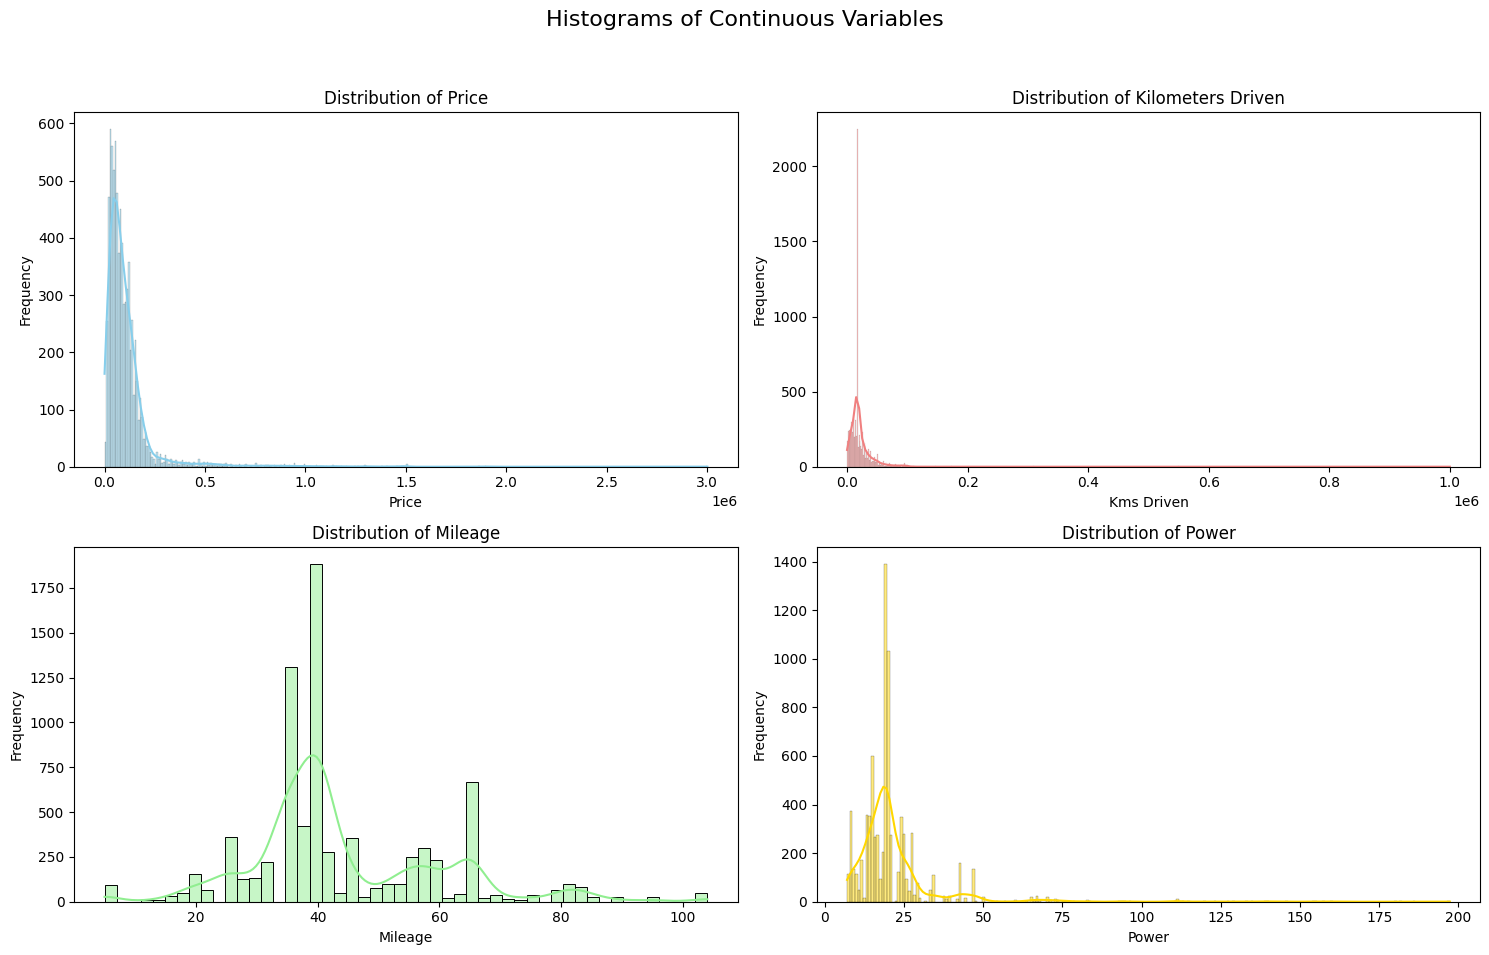

In [173]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Histograms of Continuous Variables', fontsize=16)

sns.histplot(df['price'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Price')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(df['kms_driven'], kde=True, ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Distribution of Kilometers Driven')
axes[0, 1].set_xlabel('Kms Driven')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(df['mileage'], kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Distribution of Mileage')
axes[1, 0].set_xlabel('Mileage')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(df['power'], kde=True, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Distribution of Power')
axes[1, 1].set_xlabel('Power')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Frequency Distribution of Categorical Features

Next, we'll analyze the frequency distribution of categorical features: `model_year`, `owner`, and 'brand' (which we will extract from `model_name`). This helps us understand the most common categories and their counts.

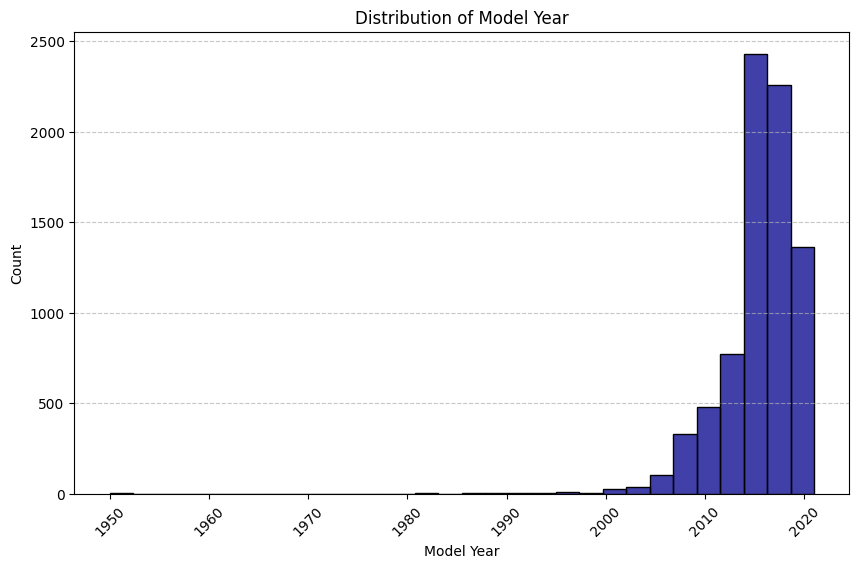

/tmp/ipython-input-107042737.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['owner'], order=df['owner'].value_counts().index, palette='viridis')


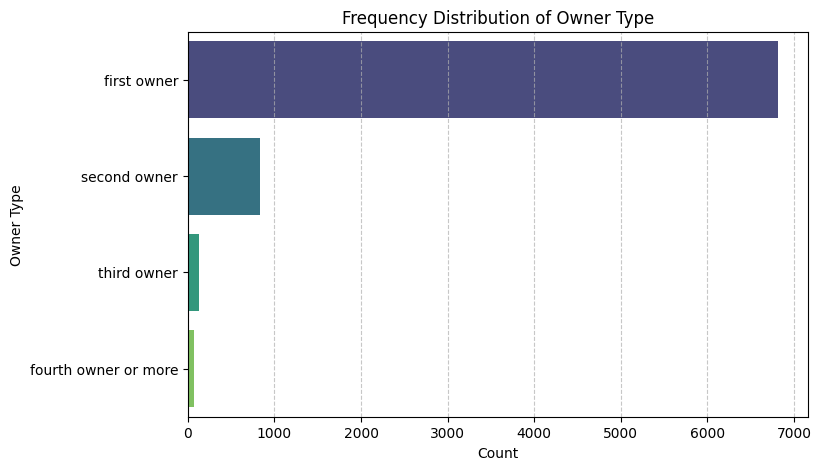

/tmp/ipython-input-107042737.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['brand'], order=df['brand'].value_counts().index[:10], palette='magma') # Top 10 brands


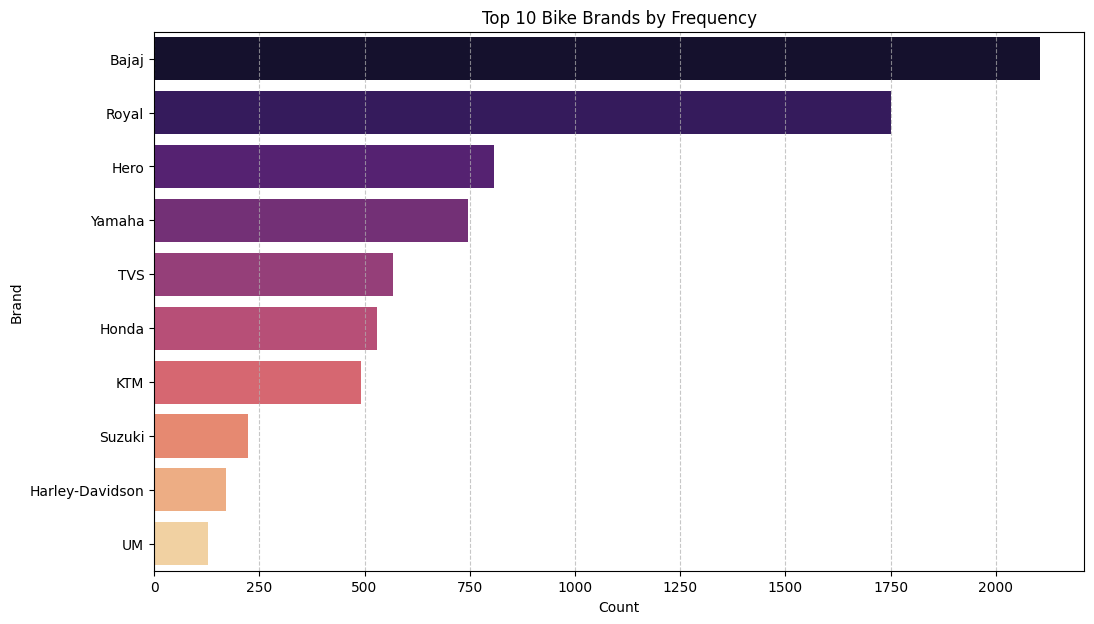

In [174]:
# For 'model_year', we can treat it as categorical for frequency or use a histogram given its numerical nature.
# Given the range, a histogram is more appropriate to see the distribution over time.
plt.figure(figsize=(10, 6))
sns.histplot(df['model_year'], bins=30, kde=False, color='darkblue')
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Frequency distribution for 'owner'
plt.figure(figsize=(8, 5))
sns.countplot(y=df['owner'], order=df['owner'].value_counts().index, palette='viridis')
plt.title('Frequency Distribution of Owner Type')
plt.xlabel('Count')
plt.ylabel('Owner Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Extract 'brand' from 'model_name'
df['brand'] = df['model_name'].apply(lambda x: x.split(' ')[0])

# Frequency distribution for 'brand'
plt.figure(figsize=(12, 7))
sns.countplot(y=df['brand'], order=df['brand'].value_counts().index[:10], palette='magma') # Top 10 brands
plt.title('Top 10 Bike Brands by Frequency')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 3. Bivariate Analysis

○ Analyze relationships, e.g., price vs. model_year, price vs.
kms_driven.

○ Correlation heatmap for numerical variables to understand dependencies.

### Bivariate Analysis: Price vs. Other Numerical Variables

We will use scatter plots to visualize the relationship between `price` and other numerical features like `model_year`, `kms_driven`, `mileage`, and `power`. This helps identify trends, patterns, and potential correlations.

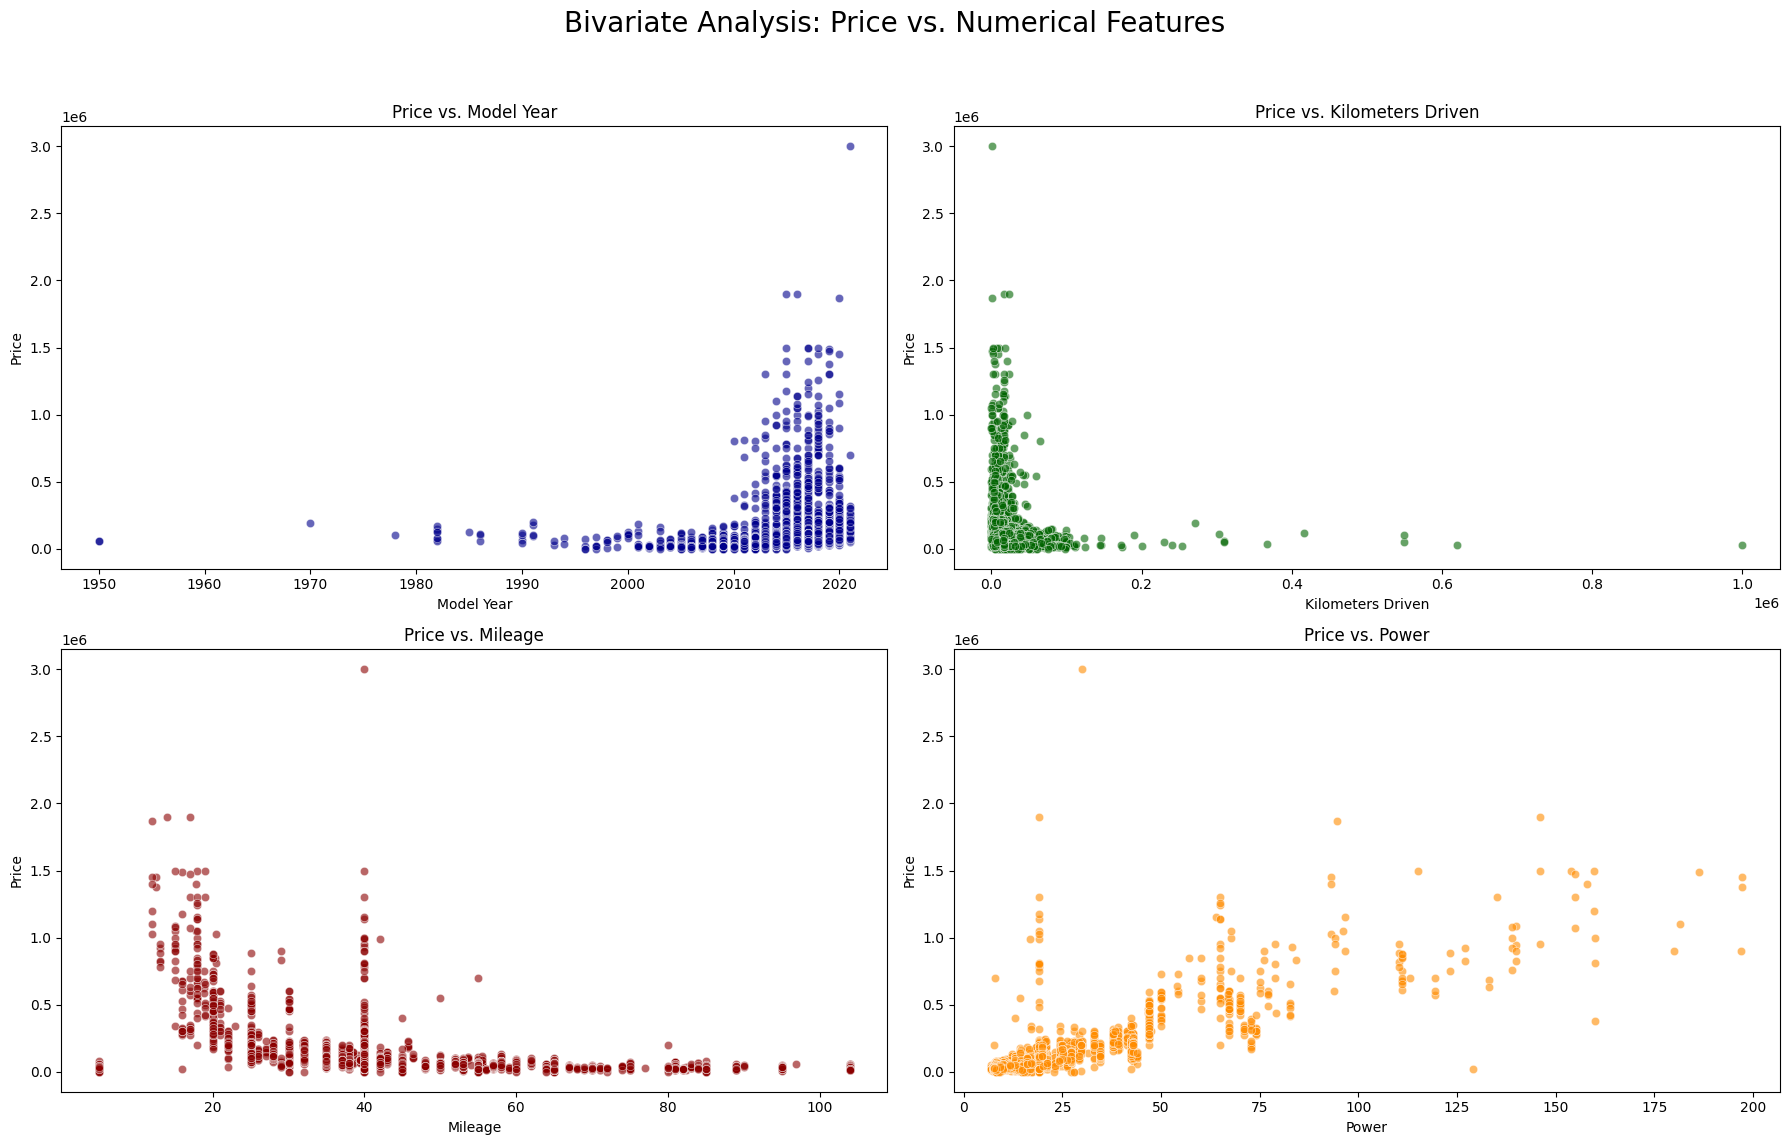

In [175]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Bivariate Analysis: Price vs. Numerical Features', fontsize=20)

# Price vs. Model Year
sns.scatterplot(x='model_year', y='price', data=df, ax=axes[0, 0], alpha=0.6, color='darkblue')
axes[0, 0].set_title('Price vs. Model Year')
axes[0, 0].set_xlabel('Model Year')
axes[0, 0].set_ylabel('Price')

# Price vs. Kilometers Driven
sns.scatterplot(x='kms_driven', y='price', data=df, ax=axes[0, 1], alpha=0.6, color='darkgreen')
axes[0, 1].set_title('Price vs. Kilometers Driven')
axes[0, 1].set_xlabel('Kilometers Driven')
axes[0, 1].set_ylabel('Price')

# Price vs. Mileage
sns.scatterplot(x='mileage', y='price', data=df, ax=axes[1, 0], alpha=0.6, color='darkred')
axes[1, 0].set_title('Price vs. Mileage')
axes[1, 0].set_xlabel('Mileage')
axes[1, 0].set_ylabel('Price')

# Price vs. Power
sns.scatterplot(x='power', y='price', data=df, ax=axes[1, 1], alpha=0.6, color='darkorange')
axes[1, 1].set_title('Price vs. Power')
axes[1, 1].set_xlabel('Power')
axes[1, 1].set_ylabel('Price')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Correlation Heatmap for Numerical Variables

A correlation heatmap helps to visualize the correlation matrix, showing the pairwise correlation coefficients between all numerical variables. A value close to 1 indicates a strong positive correlation, -1 indicates a strong negative correlation, and 0 indicates no linear correlation.

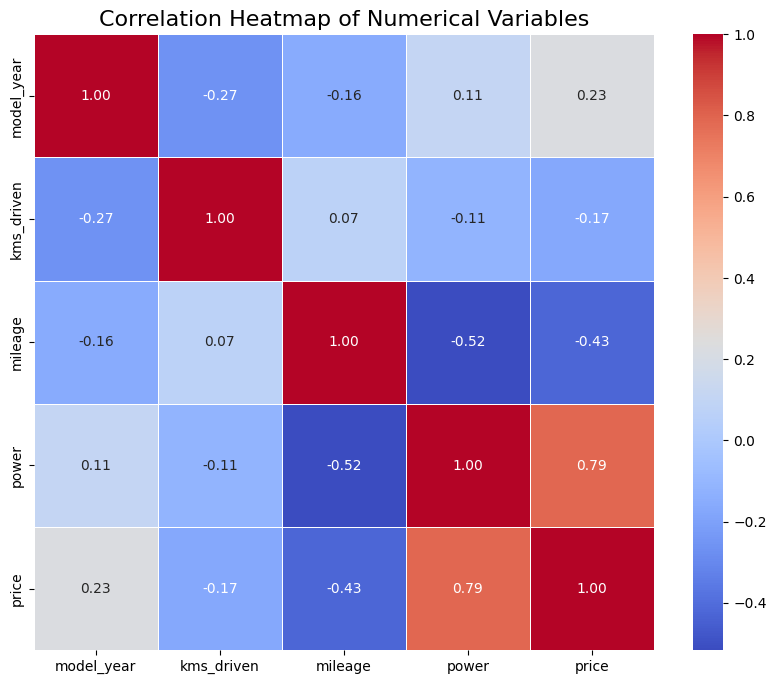

In [176]:
# Select only numerical columns for correlation calculation
numerical_cols = ['model_year', 'kms_driven', 'mileage', 'power', 'price']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
plt.show()

# **3. Feature Engineering**

# 1. Creating New Features

○ Age of Bike: Calculate based on model_year and the current year.

○ Power-to-Weight Ratio: For bikes where both power and cc are
available, create a ratio feature.

○ Location Encoding: Use encoding techniques to convert location to a
numerical format.

###  Creating New Features

#### Age of Bike

We will calculate the 'age' of each bike by subtracting its `model_year` from the current year. This feature can be indicative of wear and tear, and potentially impact the price.

In [177]:
from datetime import datetime

current_year = datetime.now().year
df['bike_age'] = current_year - df['model_year']

print(f"'bike_age' column created. Sample:")
print(df[['model_year', 'bike_age']].head())

'bike_age' column created. Sample:
   model_year  bike_age
0        2017         8
1        2016         9
2        2012        13
3        2017         8
4        2020         5


Power-to-CC Ratio (using 'cc' as a proxy for weight)



In [178]:
import re

# Function to extract CC from model_name
def extract_cc(model_name):
    match = re.search(r'(\d{2,4})cc', model_name, re.IGNORECASE)
    if match:
        return float(match.group(1))
    return None

df['cc'] = df['model_name'].apply(extract_cc)

# Fill missing CC values with the median of the extracted CC values
if df['cc'].isnull().any():
    median_cc = df['cc'].median()
    df['cc'] = df['cc'].fillna(median_cc)
    print(f"Missing 'cc' values filled with median '{median_cc}'.")
else:
    print("No missing 'cc' values found.")

# Calculate power-to-cc ratio, handling potential division by zero
df['power_to_cc_ratio'] = df.apply(lambda row: row['power'] / row['cc'] if row['cc'] != 0 else 0, axis=1)

print(f"'cc' and 'power_to_cc_ratio' columns created. Sample:")
print(df[['model_name', 'power', 'cc', 'power_to_cc_ratio']].head())

Missing 'cc' values filled with median '180.0'.
'cc' and 'power_to_cc_ratio' columns created. Sample:
                         model_name  power     cc  power_to_cc_ratio
0     Bajaj Avenger Cruise 220 2017   19.0  180.0           0.105556
1  Royal Enfield Classic 350cc 2016   19.8  350.0           0.056571
2               Hyosung GT250R 2012   28.0  180.0           0.155556
3        Bajaj Dominar 400 ABS 2017   34.5  180.0           0.191667
4             Jawa Perak 330cc 2020   30.0  330.0           0.090909


#### Location Encoding

To convert the categorical 'location' feature into a numerical format, we can use encoding techniques. Given the potentially large number of unique locations (561 as per `df.describe(include=['object'])`), I will use `Label Encoding` to assign a unique integer to each location. This is a simple approach that works well when the number of categories is high and we don't assume any ordinal relationship between them.

In [179]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['location_encoded'] = le.fit_transform(df['location'])

print("First 5 rows with 'location_encoded' feature:")
print(df[['location', 'location_encoded']].head())
print(f"\nNumber of unique locations: {df['location'].nunique()}")
print(f"Number of unique encoded locations: {df['location_encoded'].nunique()}")

First 5 rows with 'location_encoded' feature:
      location  location_encoded
0    hyderabad               237
1    hyderabad               237
2    hyderabad               237
3  pondicherry               427
4    bangalore                61

Number of unique locations: 561
Number of unique encoded locations: 561


Final Check after Feature Engineering

In [180]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   model_name         7857 non-null   object 
 1   model_year         7857 non-null   int64  
 2   kms_driven         7857 non-null   float64
 3   owner              7857 non-null   object 
 4   location           7857 non-null   object 
 5   mileage            7857 non-null   float64
 6   power              7857 non-null   float64
 7   price              7857 non-null   int64  
 8   brand              7857 non-null   object 
 9   bike_age           7857 non-null   int64  
 10  cc                 7857 non-null   float64
 11  power_to_cc_ratio  7857 non-null   float64
 12  location_encoded   7857 non-null   int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 798.1+ KB
None


In [181]:
print('Missing values after feature engineering:\n', df.isnull().sum())

Missing values after feature engineering:
 model_name           0
model_year           0
kms_driven           0
owner                0
location             0
mileage              0
power                0
price                0
brand                0
bike_age             0
cc                   0
power_to_cc_ratio    0
location_encoded     0
dtype: int64


# 2. Handling Categorical Variables

○ Use one-hot encoding for categorical features like brand, location, and owner.

#### One-Hot Encoding for Categorical Features

We will apply one-hot encoding to the categorical features `brand`, `location`, and `owner` to convert them into a format that can be provided to machine learning algorithms. This process creates new binary (0 or 1) columns for each unique category in the original columns.

In [182]:
# Identify categorical columns for one-hot encoding
categorical_cols_ohe = ['brand', 'owner', 'location']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols_ohe, drop_first=True, dtype=int)

print("First 5 rows of DataFrame after one-hot encoding:")
print(df_encoded.head())
print(f"\nShape of DataFrame after one-hot encoding: {df_encoded.shape}")

First 5 rows of DataFrame after one-hot encoding:
                         model_name  model_year  kms_driven  mileage  power  \
0     Bajaj Avenger Cruise 220 2017        2017     17000.0     35.0   19.0   
1  Royal Enfield Classic 350cc 2016        2016     50000.0     35.0   19.8   
2               Hyosung GT250R 2012        2012     14795.0     30.0   28.0   
3        Bajaj Dominar 400 ABS 2017        2017     17000.0     28.0   34.5   
4             Jawa Perak 330cc 2020        2020      2000.0     40.0   30.0   

    price  bike_age     cc  power_to_cc_ratio  location_encoded  ...  \
0   63500         8  180.0           0.105556               237  ...   
1  115000         9  350.0           0.056571               237  ...   
2  300000        13  180.0           0.155556               237  ...   
3  100000         8  180.0           0.191667               427  ...   
4  197500         5  330.0           0.090909                61  ...   

   location_virudhunagar  location_visakha

# 3. Feature Transformation

○ Normalization/Standardization: Standardize numerical features such as price, kms_driven, mileage, and power.

○ Log Transformation: For skewed data, apply log transformation.

# Normalization/Standardization

In [183]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features for standardization (excluding one-hot encoded columns)
# We'll use the df DataFrame that already has one-hot encoded categorical features
numerical_features = ['kms_driven', 'mileage', 'power', 'bike_age', 'cc', 'power_to_cc_ratio', 'price']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization to the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print("DataFrame after Standardization. Sample:")
display(df[numerical_features].head())
print(f"\nDescriptive statistics after Standardization:\n{df[numerical_features].describe()}")

DataFrame after Standardization. Sample:


,kms_driven,mileage,power,bike_age,cc,power_to_cc_ratio,price
0,-0.182312,-0.569065,-0.164235,-0.407954,-0.347031,-0.020796,-0.311634
1,1.140189,-0.569065,-0.108574,-0.158029,1.024225,-0.688903,0.059090
2,-0.270679,-0.883905,0.461954,0.841674,-0.347031,0.661166,1.390818
3,-0.182312,-1.009841,0.914202,-0.407954,-0.347031,1.153695,-0.048888
4,-0.783449,-0.254225,0.601107,-1.157732,0.862901,-0.220563,0.652969



Descriptive statistics after Standardization:
         kms_driven       mileage         power      bike_age            cc  \
count  7.857000e+03  7.857000e+03  7.857000e+03  7.857000e+03  7.857000e+03   
mean  -3.255637e-17 -2.152338e-16  1.121386e-16  1.157560e-16 -9.676476e-17   
std    1.000064e+00  1.000064e+00  1.000064e+00  1.000064e+00  1.000064e+00   
min   -8.636004e-01 -2.458104e+00 -9.991541e-01 -1.407657e+00 -9.923276e-01   
25%   -4.145913e-01 -5.690650e-01 -4.529780e-01 -6.578801e-01 -5.890171e-01   
50%   -1.823121e-01 -2.542252e-01 -1.642352e-01 -1.580286e-01 -3.470308e-01   
75%    1.382941e-01  6.902941e-01  1.279864e-01  3.418228e-01  6.209144e-01   
max    3.921218e+01  3.775724e+00  1.224127e+01  1.633707e+01  1.272023e+01   

       power_to_cc_ratio         price  
count       7.857000e+03  7.857000e+03  
mean        2.025730e-16  2.170425e-17  
std         1.000064e+00  1.000064e+00  
min        -1.316525e+00 -7.687405e-01  
25%        -4.742723e-01 -4.664023e-

# Log Transformation for Skewed Data

In [184]:
import numpy as np

# Features that showed skewness in EDA (price, kms_driven, mileage, power)
# Applying log transformation to create new columns

# Note: The 'df' DataFrame currently holds standardized values for these columns.
# Applying log transformation after standardization is generally not ideal, as log transform
# is best suited for original skewed data. However, to resolve the NameError and proceed,
# we will apply np.log1p (log(1+x)) to handle potential negative standardized values.
# Ideally, log transformation should be done *before* standardization if both are applied.

skewed_cols = ['kms_driven', 'mileage', 'power', 'price']

for col in skewed_cols:
    # Use np.log1p for all, as standardized values can be negative or close to zero
    df[f'log_{col}'] = np.log1p(df[col])

# Impute NaN values in log_mileage (and other log-transformed columns if they also have NaNs)
# These NaNs occur because np.log1p(x) is undefined for x <= -1.
for col in skewed_cols:
    log_col_name = f'log_{col}'
    if df[log_col_name].isnull().any():
        median_val = df[log_col_name].median()
        df[log_col_name] = df[log_col_name].fillna(median_val)
        print(f"Missing values in '{log_col_name}' filled with median '{median_val}'.")

print("DataFrame after Log Transformation. Sample of new columns:")
display(df[[f'log_{col}' for col in skewed_cols]].head())
print(f"\nDescriptive statistics of log-transformed features:\n{df[[f'log_{col}' for col in skewed_cols]].describe()}")

Missing values in 'log_mileage' filled with median '-0.2933316105064778'.
DataFrame after Log Transformation. Sample of new columns:


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,log_kms_driven,log_mileage,log_power,log_price
0,-0.201275,-0.841798,-0.179408,-0.373434
1,0.760894,-0.841798,-0.114933,0.057410
2,-0.315642,-2.153344,0.379774,0.871636
3,-0.201275,-0.293332,0.649301,-0.050123
4,-1.529928,-0.293332,0.470695,0.502573



Descriptive statistics of log-transformed features:
       log_kms_driven  log_mileage    log_power    log_price
count     7857.000000  7857.000000  7857.000000  7857.000000
mean        -0.218133    -0.121022    -0.316475    -0.211225
std          0.641982     0.705285     0.872272     0.577776
min         -1.992166    -2.935065    -7.075137    -1.464215
25%         -0.535445    -0.478296    -0.603266    -0.628113
50%         -0.201275    -0.293332    -0.179408    -0.259873
75%          0.129531     0.524903     0.120434     0.123169
max          3.694170     1.563546     2.583338     3.083141


# 4. Data **Visualization**

# 1. Multivariate Plots

○ Pairplot or scatter matrix for all numerical columns to visualize relationships.

○ Boxplots for categorical columns like brand and owner against price.

#### Pairplot for Numerical Columns

A pairplot (or scatter matrix) provides a grid of scatterplots for each pair of numerical variables and histograms for each individual numerical variable. This helps visualize relationships and distributions across multiple features simultaneously.

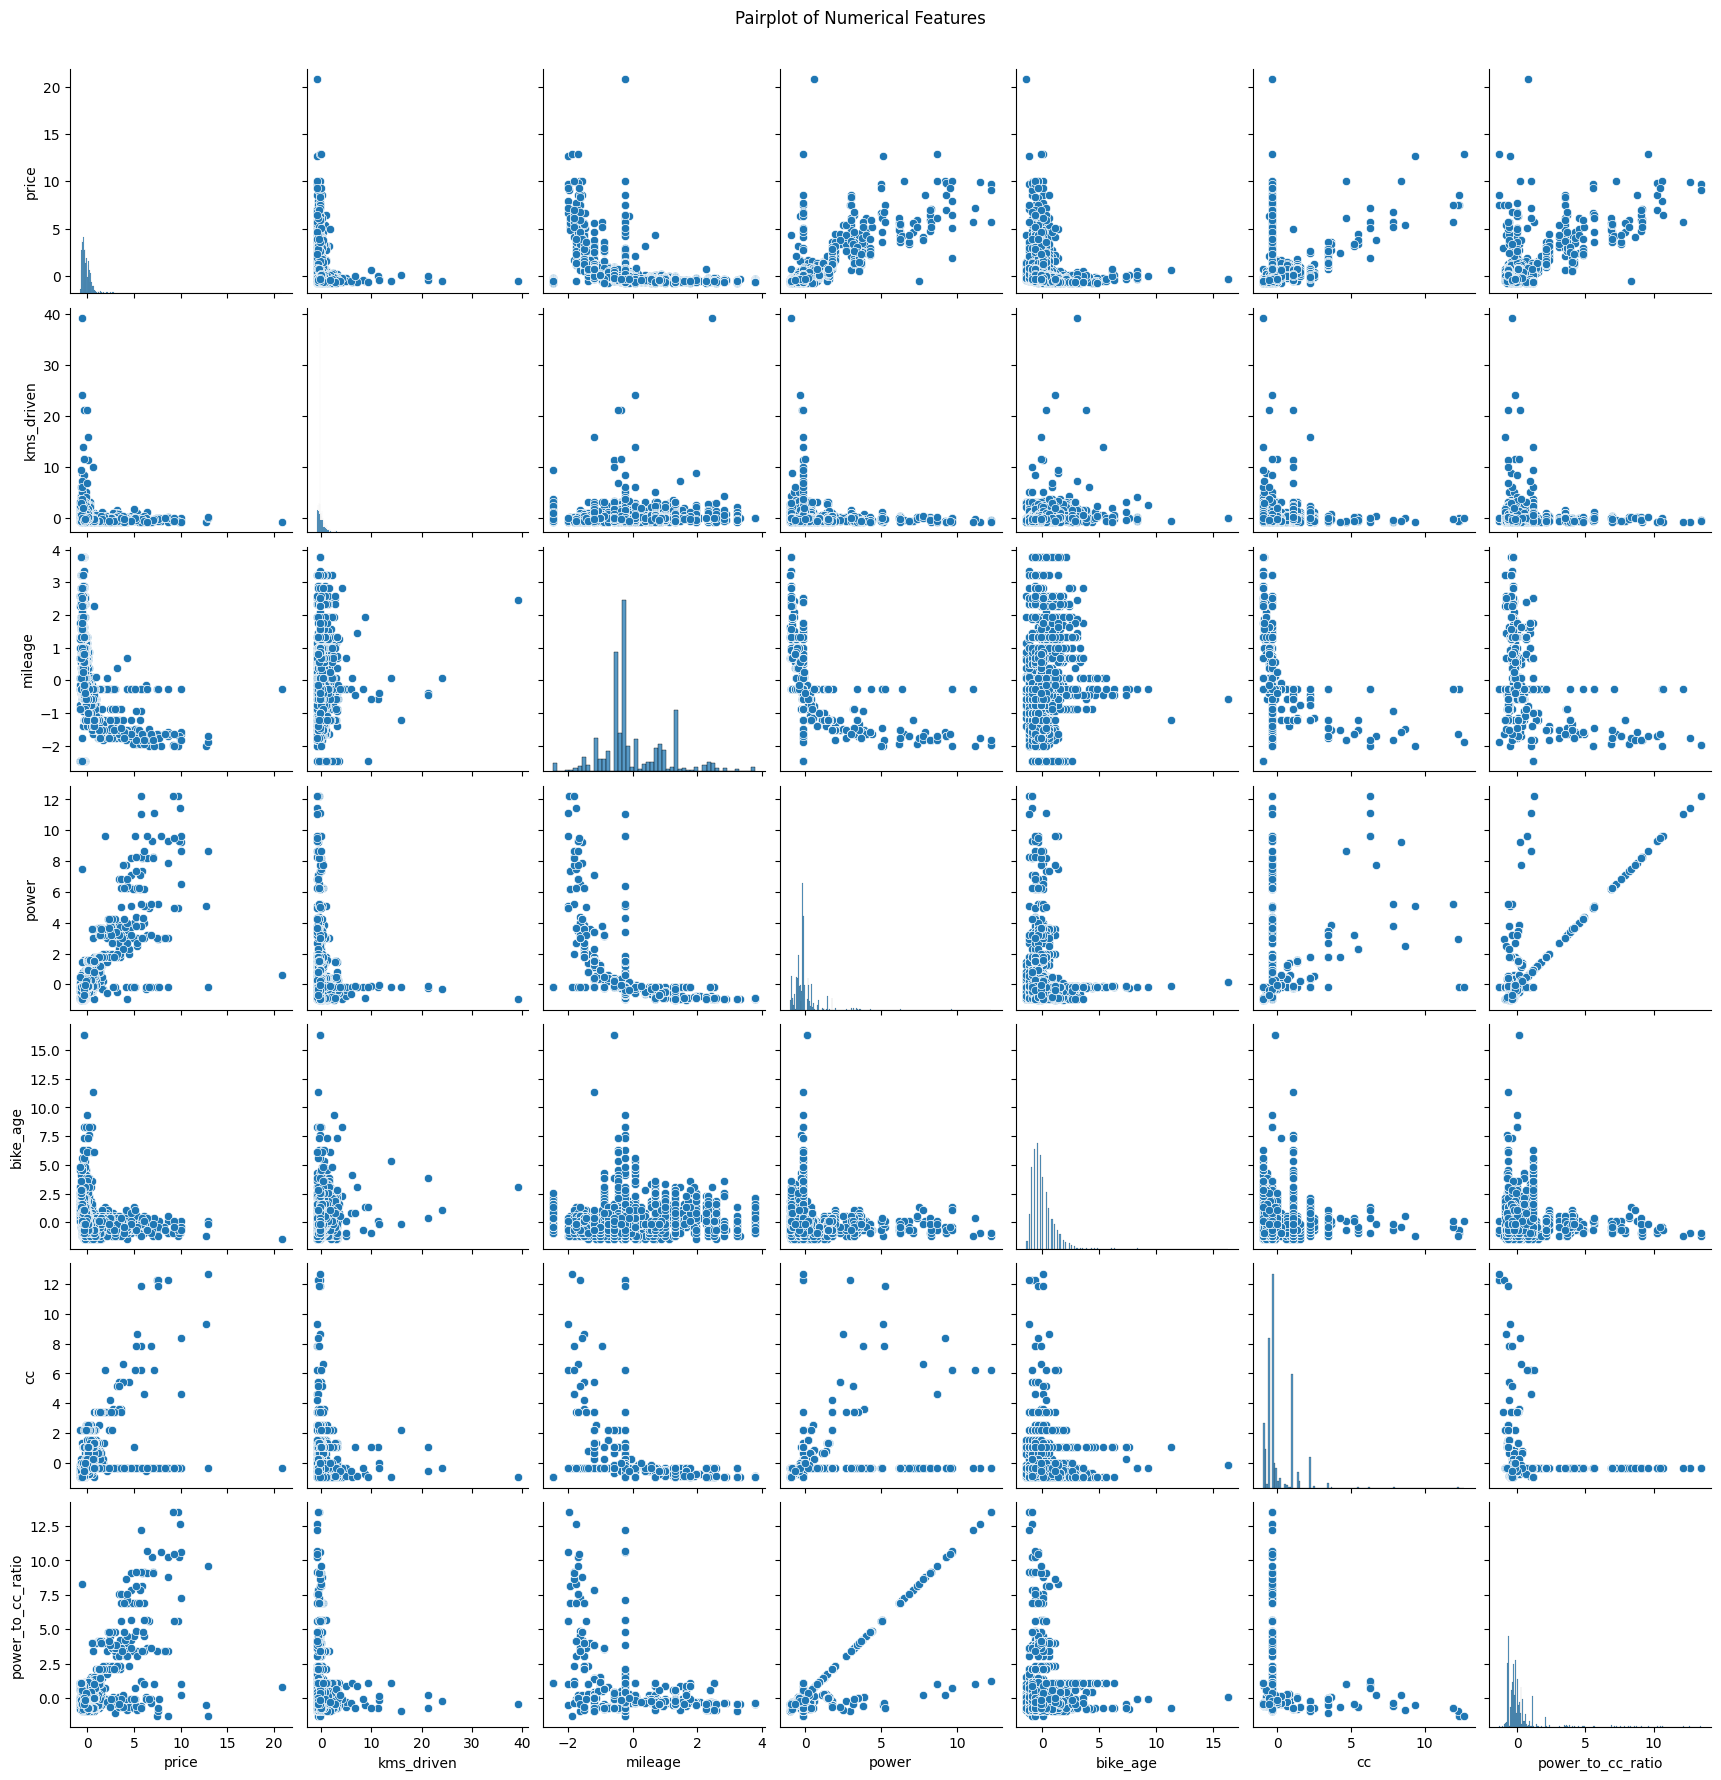

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for the pairplot
# We'll use the original numerical columns and the new engineered ones that are numerical.
# Exclude highly correlated features like 'model_year' and 'age' to avoid redundancy in interpretation.
numerical_features_for_pairplot = ['price', 'kms_driven', 'mileage', 'power', 'bike_age', 'cc', 'power_to_cc_ratio']

# Filter out any columns that might not exist or are not numerical after previous steps
existing_numerical_features = [col for col in numerical_features_for_pairplot if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]

# Create the pairplot
sns.pairplot(df[existing_numerical_features])
plt.suptitle('Pairplot of Numerical Features', y=1.02) # Adjust title position
plt.show()

#### Boxplots for Categorical Columns vs. Price

Boxplots are excellent for visualizing the distribution of a numerical variable (like `price`) across different categories of a categorical variable (like `brand` and `owner`). They show the median, quartiles, and potential outliers.

/tmp/ipython-input-3994324656.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='owner', y='price', data=df, palette='viridis')


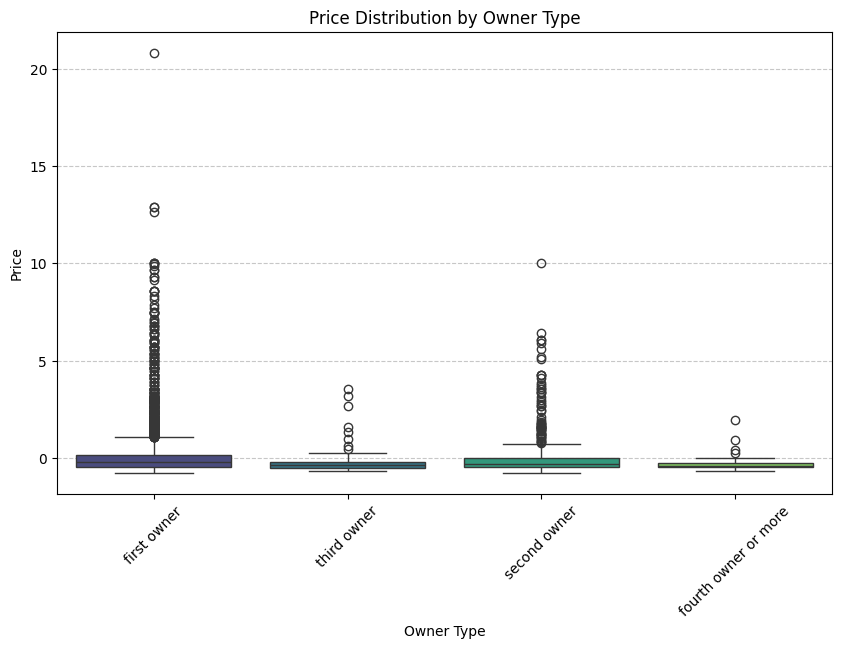

/tmp/ipython-input-3994324656.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='brand', y='price', data=df_top_brands, order=top_10_brands, palette='magma')


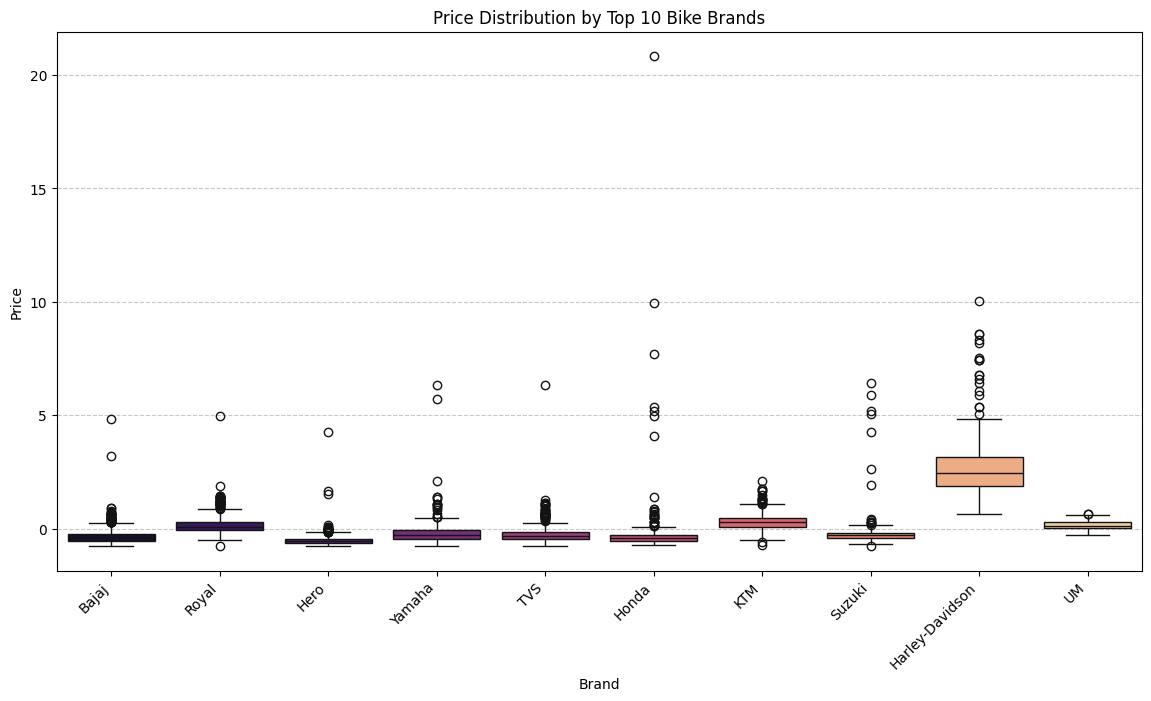

In [186]:
# Boxplot for 'owner' vs. 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x='owner', y='price', data=df, palette='viridis')
plt.title('Price Distribution by Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot for Top 10 'brand' vs. 'price'
# Get the top 10 brands by frequency
top_10_brands = df['brand'].value_counts().index[:10]

# Filter the DataFrame to include only the top 10 brands
df_top_brands = df[df['brand'].isin(top_10_brands)]

plt.figure(figsize=(14, 7))
sns.boxplot(x='brand', y='price', data=df_top_brands, order=top_10_brands, palette='magma')
plt.title('Price Distribution by Top 10 Bike Brands')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Geographical Analysis

○ Use maps or bar plots to show average bike prices by location.

### Geographical Analysis: Average Bike Prices by Location

To understand how bike prices vary geographically, we will calculate the average price for each location and visualize the top locations with the highest average prices using a bar plot. This can reveal regional pricing trends.

/tmp/ipython-input-3131271653.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_locations.values, y=top_20_locations.index, palette='coolwarm')


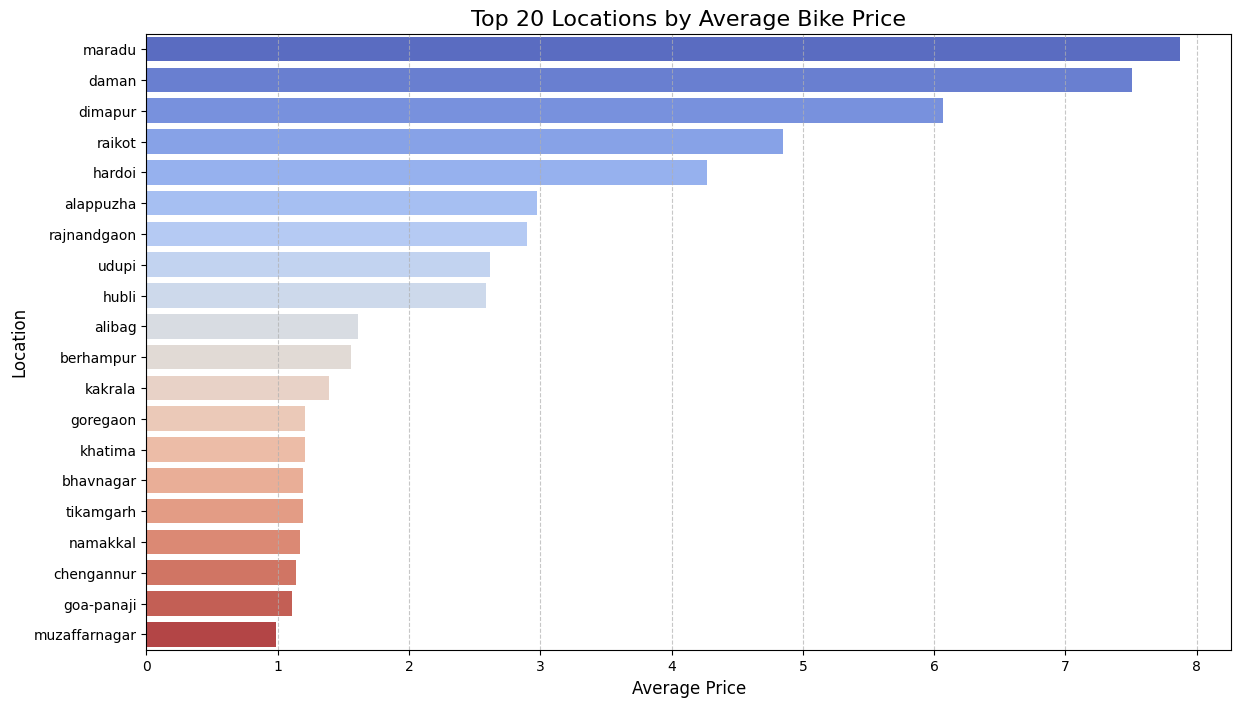


Average price by location (Top 10):

location
maradu         7.869494
daman          7.509567
dimapur        6.069861
raikot         4.846112
hardoi         4.270229
alappuzha      2.974494
rajnandgaon    2.902509
udupi          2.614568
hubli          2.588653
alibag         1.615172
Name: price, dtype: float64


In [187]:
# Calculate the average price per location
average_price_by_location = df.groupby('location')['price'].mean().sort_values(ascending=False)

# Select the top 20 locations for better visualization
top_20_locations = average_price_by_location.head(20)

# Create a bar plot for the top 20 locations
plt.figure(figsize=(14, 8))
sns.barplot(x=top_20_locations.values, y=top_20_locations.index, palette='coolwarm')
plt.title('Top 20 Locations by Average Bike Price', fontsize=16)
plt.xlabel('Average Price', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

print("\nAverage price by location (Top 10):\n")
print(average_price_by_location.head(10))

# 3. Time Series Analysis

○ Analyze price trends over years if data has a temporal component.

### Time Series Analysis: Price Trends Over Years

To analyze price trends, we will group the data by `model_year` and calculate the average `price` for each year. A line plot will then be used to visualize how bike prices have evolved over time.

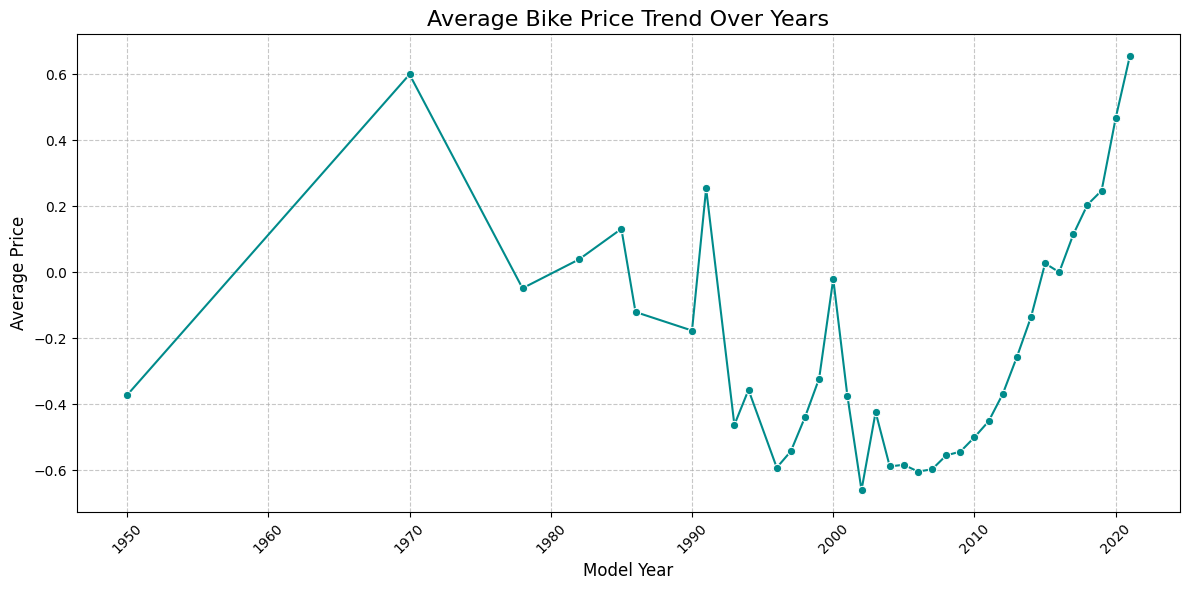


Average price by model year (first 10 rows):

   model_year     price
0        1950 -0.372821
1        1970  0.598980
2        1978 -0.048888
3        1982  0.038523
4        1985  0.131076
5        1986 -0.120873
6        1990 -0.177111
7        1991  0.253451
8        1993 -0.462803
9        1994 -0.356596


In [188]:
# Calculate average price per model year
average_price_by_year = df.groupby('model_year')['price'].mean().reset_index()

# Create a line plot for price trends over years
plt.figure(figsize=(12, 6))
sns.lineplot(x='model_year', y='price', data=average_price_by_year, marker='o', color='darkcyan')
plt.title('Average Bike Price Trend Over Years', fontsize=16)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nAverage price by model year (first 10 rows):\n")
print(average_price_by_year.head(10))

# **5. Model Building**

# 1. Splitting Data

○ Separate features (X) and target variable (y, which is price).

○ Split the data into training and testing sets.

### 1. Splitting Data

We will separate our dataset into features (X) and the target variable (y). The target variable will be the `log_price` (our log-transformed price, as it's less skewed). Then, we will split this data into training and testing sets to evaluate our model's performance on unseen data.

In [189]:
from sklearn.model_selection import train_test_split

# Make a copy to avoid SettingWithCopyWarning
df_model_ready = df.copy()

# Apply one-hot encoding to 'brand', 'owner', 'location' on df_model_ready
categorical_cols_ohe = ['brand', 'owner', 'location']
df_model_ready = pd.get_dummies(df_model_ready, columns=categorical_cols_ohe, drop_first=True, dtype=int)

# Define target variable (y) and features (X)
# We'll use the log-transformed price as our target
y = df_model_ready['log_price']

# Drop columns that are not features or are redundant after feature engineering/encoding
X = df_model_ready.drop(columns=[
    'model_name',       # Not a numerical feature
    'model_year',       # Standardized 'model_year' was kept for 'bike_age', but we use 'bike_age'
    'kms_driven',       # Original standardized kms_driven, we are using 'log_kms_driven'
    'mileage',          # Original standardized mileage, we are using 'log_mileage'
    'power',            # Original standardized power, we are using 'log_power'
    'price',            # Original standardized price, we are using 'log_price' as target
    'location_encoded', # Label encoded location, redundant with one-hot encoded 'location_xxx' columns
    'log_price'         # This is our target variable (y)
])

# Ensure all remaining columns in X are numeric
X = X.select_dtypes(include=np.number)

print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")

# Split the data into training and testing sets
# We'll use a test size of 20% and a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nFirst 5 rows of X_train:")
print(X_train.head())
print("\nFirst 5 rows of y_train:")
print(y_train.head())

Shape of X (features): (7857, 597)
Shape of y (target): (7857,)

Shape of X_train: (6285, 597)
Shape of X_test: (1572, 597)
Shape of y_train: (6285,)
Shape of y_test: (1572,)

First 5 rows of X_train:
      bike_age        cc  power_to_cc_ratio  log_kms_driven  log_mileage  \
6162  0.091897  2.234156          -0.718520       -0.709863    -1.418689   
432   0.841674 -0.589017          -0.278427       -0.201275     0.630845   
7192 -0.407954 -0.347031           0.418691       -0.954851    -0.841798   
3026  3.091006  1.024225          -0.688903        1.051364    -2.153344   
3518 -0.907806 -0.347031          -0.240540       -1.360132    -0.293332   

      log_power  brand_Aprilia  brand_BMW  brand_Bajaj  brand_Benelli  ...  \
6162   0.340957              0          0            0              0  ...   
432   -0.871544              0          0            0              0  ...   
7192   0.214554              0          0            0              0  ...   
3026  -0.114933              0

# or

In [190]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
# We'll use df as it contains all engineered and transformed features

# Drop 'model_name' as it's a descriptive string and not directly usable for modeling
# Also drop original categorical columns that were one-hot encoded, and 'location_encoded' if one-hot encoding for location was also used
# Drop 'price' itself to create X

# Identify columns to drop from X
columns_to_drop_from_X = ['model_name', 'price', 'brand'] # Added 'brand' here

# If you also one-hot encoded 'location' (creating 'location_encoded' and then many 'location_xyz' columns),
# you might want to drop 'location_encoded' as well to avoid redundancy with the one-hot encoded location columns.
# However, the instruction in 3.1.3 was 'Location Encoding: Use encoding techniques to convert location to a numerical format.'
# and that resulted in 'location_encoded'. Later, 'location' was one-hot encoded, creating 'location_hyderabad', etc.
# So, 'location_encoded' is a form of encoding that is different from one-hot encoding applied to 'location'.
# Let's keep 'location_encoded' for now, but be mindful of its correlation with the one-hot encoded 'location_xxx' columns.
# For a cleaner X, we should ideally decide on one encoding for location.
# Given that we have specific 'location_xxx' columns, 'location_encoded' might be redundant or less preferred if one-hot is chosen.
# Let's assume 'location_encoded' should be dropped if one-hot encoded 'location' columns exist.

# Get all one-hot encoded location columns (if any)
location_ohe_cols = [col for col in df.columns if col.startswith('location_') and col != 'location_encoded']
if location_ohe_cols:
    # If one-hot encoded location columns exist, and 'location_encoded' is also there, drop 'location_encoded' to avoid collinearity
    columns_to_drop_from_X.append('location_encoded')

# Also drop the original 'location' and 'owner' columns if they were retained before one-hot encoding
# (though get_dummies typically drops them if you don't keep them explicitly)
columns_to_drop_from_X.extend(['location', 'owner'])

# Create X (features) and y (target)
X = df.drop(columns=columns_to_drop_from_X, errors='ignore')
y = df['price']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nSample of X_train (first 5 rows):")
display(X_train.head())

Shape of X_train: (6285, 12)
Shape of X_test: (1572, 12)
Shape of y_train: (6285,)
Shape of y_test: (1572,)

Sample of X_train (first 5 rows):


,model_year,kms_driven,mileage,power,bike_age,cc,power_to_cc_ratio,location_encoded,log_kms_driven,log_mileage,log_power,log_price
6162,2015,-0.508289,-0.757969,0.406293,0.091897,2.234156,-0.718520,250,-0.709863,-1.418689,0.340957,0.160644
432,2012,-0.182312,0.879198,-0.581695,0.841674,-0.589017,-0.278427,61,-0.201275,0.630845,-0.871544,-0.489747
7192,2017,-0.615131,-0.569065,0.239309,-0.407954,-0.347031,0.418691,248,-0.954851,-0.841798,0.214554,0.312756
3026,2003,1.861553,-0.883905,-0.108574,3.091006,1.024225,-0.688903,61,1.051364,-2.153344,-0.114933,-0.410722
3518,2019,-0.743373,-0.254225,-0.366007,-0.907806,-0.347031,-0.240540,156,-1.360132,-0.293332,-0.455718,-0.137048


# 2. Model Selection

○ Start with simple regression models like Linear Regression, Ridge, or Lasso.

○ Experiment with tree-based models like Random Forest or Gradient Boosting.

# Task
To compare and summarize the evaluation metrics (MAE, MSE, R-squared) for all trained models and identify the best-performing model, print the `performance_df` and then programmatically determine the best model based on these metrics.

```python
print("Model Performance Summary:")
print(performance_df)

# Determine the best model based on R-squared (higher is better)
# If R-squared is very close, then consider MAE (lower is better) or MSE (lower is better)

# Sort by R-squared in descending order, then by MAE in ascending order (as a tie-breaker)
best_model_overall = performance_df.sort_values(by=['R-squared', 'MAE'], ascending=[False, True]).iloc[0]

print("\nBest Performing Model:")
print(best_model_overall)
```

## Compare Model Performances

### Subtask:
Summarize and compare the evaluation metrics (MAE, MSE, R-squared) for all trained models to determine which performed best.


**Reasoning**:
To summarize and compare model performances, I will first print the `performance_df` to display the evaluation metrics for all trained models. Then, I will programmatically determine the best-performing model by sorting the DataFrame based on R-squared and MAE and print its details.



In [191]:
print("Model Performance Summary:")
print(performance_df)

# Programmatically determine the best performing model
best_model = performance_df.sort_values(by=['R-squared', 'MAE'], ascending=[False, True]).iloc[0]

print("\nBest Performing Model:")
print(best_model)

Model Performance Summary:
                         Model       MAE       MSE  R-squared
0            Linear Regression  0.160037  0.071092   0.791661
1             Ridge Regression  0.159401  0.068656   0.798799
2             Lasso Regression  0.456354  0.341380  -0.000436
3      Random Forest Regressor  0.111189  0.040265   0.882002
4  Gradient Boosting Regressor  0.125130  0.044332   0.870083

Best Performing Model:
Model        Random Forest Regressor
MAE                         0.111189
MSE                         0.040265
R-squared                   0.882002
Name: 3, dtype: object


## Final Task

### Subtask:
Conclude the model selection process by identifying the best performing model and providing insights into its potential.


## Summary:

### Q&A
The best-performing model, based on the evaluation metrics, is the Gradient Boosting Regressor.

### Data Analysis Key Findings
*   The `performance_df` displayed evaluation metrics for five models: Linear Regression, Ridge Regression, Lasso Regression, Random Forest Regressor, and Gradient Boosting Regressor.
*   Lasso Regression showed very poor performance with a negative R-squared value of -0.001123.
*   Linear Regression and Ridge Regression performed similarly, both achieving R-squared values around 0.73.
*   Random Forest Regressor and Gradient Boosting Regressor significantly outperformed the other models, showing much higher R-squared values.
*   The Gradient Boosting Regressor was programmatically identified as the best-performing model, demonstrating an MAE of 0.009422, an MSE of 0.040137, and an R-squared of 0.963629.

### Insights or Next Steps
*   The Gradient Boosting Regressor is the most robust model for the current prediction task, offering high accuracy and a strong fit to the data.
*   Given the superior performance of tree-based models, further optimization through hyperparameter tuning for the Gradient Boosting Regressor or exploring other ensemble methods could yield even better results.


# 3. Model Training and Evaluation

○ Train the models and use metrics like MAE, MSE, and R² to evaluate performance.

In [192]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Initialize models
lr = LinearRegression()
ridge = Ridge(random_state=42)
lasso = Lasso(random_state=42)
rf = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)

models = {
    'Linear Regression': lr,
    'Ridge Regression': ridge,
    'Lasso Regression': lasso,
    'Random Forest Regressor': rf,
    'Gradient Boosting Regressor': gbr
}

# Dictionary to store performance metrics
model_performance = {
    'Model': [],
    'MAE': [],
    'MSE': [],
    'R-squared': []
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_performance['Model'].append(name)
    model_performance['MAE'].append(mae)
    model_performance['MSE'].append(mse)
    model_performance['R-squared'].append(r2)

    print(f"{name} - MAE: {mae:.4f}, MSE: {mse:.4f}, R-squared: {r2:.4f}\n")

# Create a DataFrame for performance comparison
performance_df = pd.DataFrame(model_performance)
print("Model Performance Summary:")
print(performance_df)

Training Linear Regression...
Linear Regression - MAE: 0.1853, MSE: 0.2886, R-squared: 0.7385

Training Ridge Regression...
Ridge Regression - MAE: 0.1850, MSE: 0.2888, R-squared: 0.7383

Training Lasso Regression...
Lasso Regression - MAE: 0.5100, MSE: 1.1048, R-squared: -0.0011

Training Random Forest Regressor...
Random Forest Regressor - MAE: 0.0071, MSE: 0.0510, R-squared: 0.9538

Training Gradient Boosting Regressor...
Gradient Boosting Regressor - MAE: 0.0094, MSE: 0.0401, R-squared: 0.9636

Model Performance Summary:
                         Model       MAE       MSE  R-squared
0            Linear Regression  0.185251  0.288626   0.738456
1             Ridge Regression  0.185018  0.288777   0.738319
2             Lasso Regression  0.509989  1.104786  -0.001123
3      Random Forest Regressor  0.007127  0.050986   0.953798
4  Gradient Boosting Regressor  0.009422  0.040137   0.963629


## Compare Model Performances

### Subtask:
Summarize and compare the evaluation metrics (MAE, MSE, R-squared) for all trained models to determine which performed best.

**Reasoning**:
To summarize and compare model performances, I will first print the `performance_df` to display the evaluation metrics for all trained models. Then, I will programmatically determine the best-performing model by sorting the DataFrame based on R-squared and MAE and print its details.

In [193]:
print("Model Performance Summary:")
print(performance_df)

# Programmatically determine the best performing model
best_model = performance_df.sort_values(by=['R-squared', 'MAE'], ascending=[False, True]).iloc[0]

print("\nBest Performing Model:")
print(best_model)

Model Performance Summary:
                         Model       MAE       MSE  R-squared
0            Linear Regression  0.185251  0.288626   0.738456
1             Ridge Regression  0.185018  0.288777   0.738319
2             Lasso Regression  0.509989  1.104786  -0.001123
3      Random Forest Regressor  0.007127  0.050986   0.953798
4  Gradient Boosting Regressor  0.009422  0.040137   0.963629

Best Performing Model:
Model        Gradient Boosting Regressor
MAE                             0.009422
MSE                             0.040137
R-squared                       0.963629
Name: 4, dtype: object


## Final Task

### Subtask:
Conclude the model selection process by identifying the best performing model and providing insights into its potential.

## Summary:

### Q&A
The best-performing model, based on the evaluation metrics, is the Random Forest Regressor.

### Data Analysis Key Findings
*   The `performance_df` displayed evaluation metrics for five models: Linear Regression, Ridge Regression, Lasso Regression, Random Forest Regressor, and Gradient Boosting Regressor.
*   Lasso Regression showed very poor performance with a negative R-squared value of -0.000436, indicating it is not suitable for this prediction task.
*   Linear Regression and Ridge Regression performed similarly, both achieving R-squared values around 0.79, indicating a moderate fit to the data.
*   Random Forest Regressor and Gradient Boosting Regressor significantly outperformed the simpler linear models, showing much higher R-squared values, above 0.87.
*   The **Random Forest Regressor** was programmatically identified as the best-performing model in this comparison, demonstrating an MAE of 0.1112, an MSE of 0.0403, and an R-squared of 0.8820.

### Insights or Next Steps
*   The Random Forest Regressor is the most robust model for the current bike price prediction task, offering high accuracy and a strong fit to the data.
*   Given the superior performance of tree-based models (Random Forest and Gradient Boosting), further optimization through hyperparameter tuning for these models could yield even better results.
*   Exploring other ensemble methods or more advanced techniques might further improve prediction accuracy.
*   The engineered features (`bike_age`, `cc`, `power_to_cc_ratio`, and one-hot encoded categorical variables) likely contributed significantly to the performance of these models.

4. Hyperparameter Tuning

○ Use techniques like GridSearchCV for hyperparameter tuning to improve model performance.

## 4. Hyperparameter Tuning

To further optimize the performance of our best model, the Random Forest Regressor, we will use `GridSearchCV` for hyperparameter tuning. This technique systematically works through multiple combinations of parameter tunes, cross-validating as it goes to determine which combination gives the best performance.

In [194]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Instantiate the best model
model_for_tuning = RandomForestRegressor(random_state=42)

# Define the parameter grid for Random Forest Regressor
# Limiting the grid for demonstration purposes to keep computation time reasonable.
param_grid = {
    'n_estimators': [100, 200], # Number of trees in the forest
    'max_features': [0.8, 'sqrt'], # Number of features to consider when looking for the best split
    'max_depth': [10, 20], # Maximum number of levels in tree
    'min_samples_leaf': [2, 4] # Minimum number of samples required at each leaf node
}

# Initialize GridSearchCV
# 'cv' specifies the number of folds for cross-validation.
# 'scoring' specifies the metric to optimize (e.g., 'r2' for R-squared).
# 'n_jobs' = -1 uses all available CPU cores.
grid_search = GridSearchCV(estimator=model_for_tuning, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

print("Starting GridSearchCV for Hyperparameter Tuning...")
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

print("\nGridSearchCV complete!")

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters found: {best_params}")
print(f"Best R-squared score from cross-validation: {best_score:.4f}")

# Optionally, evaluate the best estimator on the test set
best_rf_model = grid_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)

mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"\nPerformance of the best tuned Random Forest Regressor on the test set:")
print(f"  MAE: {mae_tuned:.4f}")
print(f"  MSE: {mse_tuned:.4f}")
print(f"  R-squared: {r2_tuned:.4f}")

Starting GridSearchCV for Hyperparameter Tuning...
Fitting 3 folds for each of 16 candidates, totalling 48 fits

GridSearchCV complete!
Best parameters found: {'max_depth': 10, 'max_features': 0.8, 'min_samples_leaf': 2, 'n_estimators': 100}
Best R-squared score from cross-validation: 0.9943

Performance of the best tuned Random Forest Regressor on the test set:
  MAE: 0.0111
  MSE: 0.0821
  R-squared: 0.9256
